## 1 Localização e Download do Dataset Público

### 1.1 Dataset: **European Soccer Database**

🔗 **Link:** [https://www.kaggle.com/datasets/hugomathien/soccer](https://www.kaggle.com/datasets/hugomathien/soccer)

### 1.2 Sobre o Dataset

O *European Soccer Database* é um dos maiores conjuntos de dados públicos sobre futebol na Europa, contendo informações completas para análises e aplicações de machine learning.

### 1.3 O que está incluído:

* **+25.000** partidas
* **+10.000** jogadores
* **11 países europeus** com suas principais ligas
* Temporadas de **2008 a 2016**
* Atributos de jogadores e times (originados do FIFA e atualizados semanalmente)
* Formações e coordenadas (X,Y) dos jogadores em campo
* Odds de apostas de até **10 casas diferentes**
* Eventos detalhados de partidas

  * Tipos de gol
  * Posse de bola
  * Escanteios
  * Cruzamentos
  * Faltas
  * Cartões
  * E muito mais
* *(Atualização de 16/10/2016: nova tabela contendo atributos completos dos times do FIFA)*


## 2 Importação dos Dados em Python

Este trecho demonstra como **carregar um banco de dados SQLite** no Python utilizando as bibliotecas **sqlite3**, **pandas** e **matplotlib**, além de como listar as tabelas disponíveis banco de dados.

### 2.1 Dependências Necessárias

Antes de executar o código, instale as seguintes bibliotecas:

```bash
pip install pandas matplotlib
```

> Obs.: A biblioteca `sqlite3` já vem incluída por padrão no Python.

### 2.2 Descrição Geral do Código

O objetivo deste trecho é:

1. **Conectar a um banco de dados SQLite** (.sqlite).
2. **Carregar as tabelas disponíveis** usando pandas.
3. **Exibir o nome de todas as tabelas presentes no banco**.

### 2.3 Explicação Passo a Passo

#### 2.3.1 Importação das bibliotecas

* `sqlite3` → permite abrir e consultar bancos SQLite.
* `pandas` → ideal para manipulação de dados e tabelas.
* `matplotlib.pyplot` → usado posteriormente para gerar gráficos.



In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# opcional, mas recomendado no Jupyter:
%matplotlib inline

##Caminho para o arquivo SQLite
db_path = "../DataBase/database.sqlite"

##Conectar ao banco
conn = sqlite3.connect(db_path)

##Listar todas as tabelas
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [2]:
## Ler uma tabela específica (exemplo: Times da Premier League)
df_queryResult = pd.read_sql("SELECT DISTINCT team_long_name FROM Team WHERE team_api_id IN (SELECT home_team_api_id FROM Match WHERE league_id = (SELECT id FROM League WHERE name = 'England Premier League') UNION SELECT away_team_api_id FROM Match WHERE league_id = (SELECT id FROM League WHERE name = 'England Premier League'));", conn)

## Mostrar primeiras linhas
df_queryResult

,team_long_name
0,Burnley
1,Leicester City
2,Cardiff City
3,Chelsea
4,Manchester City
5,Portsmouth
6,Southampton
7,Sunderland
8,Blackpool
9,Wigan Athletic


## 3 Estrutura da Análise Exploratória

### 3.1 Dimensões

```python
df_tabela.shape
```

* **Objetivo**: Mostrar o número de **linhas** e **colunas** da tabela.
* **Significado**:

  * **Linhas**: Quantos registros (ou entradas) estão presentes na tabela.
  * **Colunas**: Quantas variáveis (ou atributos) a tabela possui.

**Exemplo**:

```python
(11060, 8)
```

Aqui, temos 11.060 registros e 8 variáveis (colunas) na tabela.

### 3.2 Tipos das Colunas

```python
df_tabela.dtypes
```

* **Objetivo**: Exibir o tipo de dado de cada coluna, como `int64`, `float64`, `object`, etc.
* **Significado**:

  * Isso ajuda a entender **como os dados estão armazenados** (numéricos, texto, datas, etc.).

**Exemplo**:

```python
id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id     int64
birthday               object
height                float64
weight                float64
dtype: object
```

Aqui, vemos que **id, player_api_id, player_fifa_api_id** são numéricos (`int64`), enquanto **player_name, birthday** são **texto** (`object`), e **height, weight** são **números com ponto flutuante** (`float64`).

### 3.3 Primeiras Linhas

```python
df_tabela.head(5)
```

* **Objetivo**: Exibir as **primeiras 5 linhas** da tabela para ter uma visão rápida dos dados.
* **Significado**: Isso ajuda a **visualizar** os dados reais e garantir que tudo esteja conforme esperado.

**Exemplo**:

```python
   id  player_api_id player_name     player_fifa_api_id  birthday    height   weight
0   1        2625.0    Danilo              165664.91   1989-03-02     181.87    168.38
1   2        2626.0    Messi               165665.50   1987-07-24     169.80    140.00
2   3        2627.0    Neymar              165666.00   1992-02-05     170.80    130.00
3   4        2628.0    Ronaldo             165667.12   1985-06-23     180.50    150.00
4   5        2629.0    Mbappé              165668.30   1999-12-08     175.00    160.00
```

### 3.4 Estatísticas Descritivas

Aqui, vamos **explicar cada linha da tabela de estatísticas descritivas** gerada por:

```python
df_tabela.describe(include="all")
```

A função `describe()` gera várias **estatísticas resumo** para cada coluna numérica e categórica. Vamos detalhar cada linha da saída.

#### 3.4.1 Explicação das linhas:

| **Linha**  | **Significado**                                                                                                                                    |
| ---------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **count**  | **Número de valores não nulos** na coluna. Exemplo: se a coluna "height" tiver valores ausentes, o count mostrará quantos valores válidos existem. |
| **unique** | Número de **valores únicos** em uma coluna. Usado principalmente para colunas categóricas (como "player_name").                                    |
| **top**    | O **valor mais frequente** (modo) na coluna. Por exemplo, qual jogador aparece mais vezes no dataset.                                              |
| **freq**   | A **frequência** do valor mais comum na coluna. Se "Danilo" é o nome mais repetido, o `freq` mostrará quantas vezes ele aparece.                   |
| **mean**   | **Média** dos valores numéricos na coluna. Exemplo: a média das alturas dos jogadores.                                                             |
| **std**    | O **desvio padrão** dos valores, mostrando a **dispersão** dos dados. Valores mais altos indicam maior variação.                                   |
| **min**    | O **menor valor** registrado na coluna (para colunas numéricas). Exemplo: a altura mais baixa dos jogadores.                                       |
| **25%**    | O **1º quartil** (25%) dos dados, ou seja, 25% dos valores estão abaixo desse ponto.                                                               |
| **50%**    | O **2º quartil** (50%) ou **mediana**. Metade dos valores estão abaixo e metade acima desse valor.                                                 |
| **75%**    | O **3º quartil** (75%) dos dados, ou seja, 75% dos valores estão abaixo desse ponto.                                                               |
| **max**    | O **maior valor** registrado na coluna (para colunas numéricas). Exemplo: a altura mais alta dos jogadores.                                        |

#### 3.4.2 Exemplo de Saída:

Suponha que a tabela de estatísticas para a coluna `height` seja assim:

```
       height
count   11060.000000
unique         NaN
top            NaN
freq           NaN
mean      181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
```

#### 3.4.3 Como interpretar:

1. **count**: Há 11.060 jogadores com altura registrada.
2. **unique**: Não se aplica aqui, pois "height" é numérica.
3. **top**: Não se aplica aqui, pois "height" não tem um valor mais frequente.
4. **freq**: Também não se aplica a números.
5. **mean**: A **média da altura** dos jogadores é **181.87 cm**.
6. **std**: O **desvio padrão** é **6.37 cm**, indicando que a altura dos jogadores tem uma variação de aproximadamente 6 cm.
7. **min**: O jogador mais baixo tem **157.48 cm**.
8. **25%**: 25% dos jogadores têm altura **menor ou igual a 177.8 cm**.
9. **50%**: A mediana da altura dos jogadores é **182.88 cm** (meio dos dados).
10. **75%**: 75% dos jogadores têm altura **menor ou igual a 185.42 cm**.
11. **max**: O jogador mais alto tem **208.28 cm**.


In [3]:
import pandas as pd

# Lista de tabelas para excluir da análise
tabelas_excluidas = ['sqlite_sequence', 'Player_Attributes', 'Team_Attributes']

# Listar todas as tabelas do banco
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)

# Filtrar tabelas
tabelas_filtradas = tables[~tables['name'].isin(tabelas_excluidas)]

for idx, tabela in enumerate(tabelas_filtradas['name']):
    print(f"Analisando a tabela: {tabela}")
    
    # Carregar dados da tabela
    df_tabela = pd.read_sql(f"SELECT * FROM {tabela}", conn)
    
    # Exibir dimensões formatadas como tabela
    print(f"\nDimensões da tabela {tabela}:")
    dim = pd.DataFrame({
        "Tabela": [tabela],
        "Linhas": [df_tabela.shape[0]],
        "Colunas": [df_tabela.shape[1]]
    })
    display(dim)
    
    # Exibir tipos das colunas (formatado)
    print(f"\nTipos das colunas da tabela {tabela}:")
    tipos = pd.DataFrame({
        "Coluna": df_tabela.dtypes.index,
        "Tipo": df_tabela.dtypes.values
    })
    display(tipos)
    
    # Exibir as primeiras linhas
    print(f"\nPrimeiras linhas da tabela {tabela}:")
    display(df_tabela.head(5))
    
    # Estatísticas básicas
    print(f"\nEstatísticas descritivas da tabela {tabela}:")
    estatisticas = df_tabela.describe(include="all")
    display(estatisticas)
    
    # Só imprime o separador se não for a última tabela
    if idx < len(tabelas_filtradas) - 1:
        print("\n" + "="*50 + "\n")


Analisando a tabela: Player

Dimensões da tabela Player:


,Tabela,Linhas,Colunas
0,Player,11060,7



Tipos das colunas da tabela Player:


,Coluna,Tipo
0,id,int64
1,player_api_id,int64
2,player_name,object
3,player_fifa_api_id,int64
4,birthday,object
5,height,float64
6,weight,int64



Primeiras linhas da tabela Player:


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154



Estatísticas descritivas da tabela Player:


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
count,11060.000000,11060.000000,11060,11060.000000,11060,11060.000000,11060.000000
unique,NaN,NaN,10848,NaN,5762,NaN,NaN
top,NaN,NaN,Danilo,NaN,1989-03-02 00:00:00,NaN,NaN
freq,NaN,NaN,7,NaN,10,NaN,NaN
mean,5537.511392,156582.427215,NaN,165664.910488,NaN,181.867445,168.380289
std,3197.692647,160713.700624,NaN,58649.928360,NaN,6.369201,14.990217
min,1.000000,2625.000000,NaN,2.000000,NaN,157.480000,117.000000
25%,2767.750000,35555.500000,NaN,151889.500000,NaN,177.800000,159.000000
50%,5536.500000,96619.500000,NaN,184671.000000,NaN,182.880000,168.000000
75%,8306.250000,212470.500000,NaN,203883.250000,NaN,185.420000,179.000000




Analisando a tabela: Match

Dimensões da tabela Match:


,Tabela,Linhas,Colunas
0,Match,25979,115



Tipos das colunas da tabela Match:


,Coluna,Tipo
0,id,int64
1,country_id,int64
2,league_id,int64
3,season,object
4,stage,int64
...,...,...
110,GBD,float64
111,GBA,float64
112,BSH,float64
113,BSD,float64



Primeiras linhas da tabela Match:


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67



Estatísticas descritivas da tabela Match:


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979,25979.000000,25979,2.597900e+04,25979.000000,25979.000000,25979.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
unique,NaN,NaN,NaN,8,NaN,1694,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2008/2009,NaN,2009-04-11 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3326,NaN,60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12990.000000,11738.630317,11738.630317,NaN,18.242773,NaN,1.195429e+06,9984.371993,9984.475115,1.544594,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,NaN,10.407354,NaN,4.946279e+05,14087.453758,14087.445135,1.297158,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,NaN,1.000000,NaN,4.831290e+05,1601.000000,1601.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,NaN,9.000000,NaN,7.684365e+05,8475.000000,8475.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,NaN,18.000000,NaN,1.147511e+06,8697.000000,8697.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,NaN,27.000000,NaN,1.709852e+06,9925.000000,9925.000000,2.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000




Analisando a tabela: League

Dimensões da tabela League:


,Tabela,Linhas,Colunas
0,League,11,3



Tipos das colunas da tabela League:


,Coluna,Tipo
0,id,int64
1,country_id,int64
2,name,object



Primeiras linhas da tabela League:


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A



Estatísticas descritivas da tabela League:


,id,country_id,name
count,11.000000,11.000000,11
unique,NaN,NaN,11
top,NaN,NaN,Belgium Jupiler League
freq,NaN,NaN,1
mean,12452.090909,12452.090909,NaN
std,8215.308472,8215.308472,NaN
min,1.000000,1.000000,NaN
25%,6289.000000,6289.000000,NaN
50%,13274.000000,13274.000000,NaN
75%,18668.000000,18668.000000,NaN




Analisando a tabela: Country

Dimensões da tabela Country:


,Tabela,Linhas,Colunas
0,Country,11,2



Tipos das colunas da tabela Country:


,Coluna,Tipo
0,id,int64
1,name,object



Primeiras linhas da tabela Country:


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy



Estatísticas descritivas da tabela Country:


,id,name
count,11.000000,11
unique,NaN,11
top,NaN,Belgium
freq,NaN,1
mean,12452.090909,NaN
std,8215.308472,NaN
min,1.000000,NaN
25%,6289.000000,NaN
50%,13274.000000,NaN
75%,18668.000000,NaN




Analisando a tabela: Team

Dimensões da tabela Team:


,Tabela,Linhas,Colunas
0,Team,299,5



Tipos das colunas da tabela Team:


,Coluna,Tipo
0,id,int64
1,team_api_id,int64
2,team_fifa_api_id,float64
3,team_long_name,object
4,team_short_name,object



Primeiras linhas da tabela Team:


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB



Estatísticas descritivas da tabela Team:


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
count,299.000000,299.000000,288.000000,299,299
unique,NaN,NaN,NaN,296,259
top,NaN,NaN,NaN,Royal Excel Mouscron,VAL
freq,NaN,NaN,NaN,2,3
mean,23735.301003,12340.521739,21534.305556,NaN,NaN
std,15167.914719,25940.411135,42456.439408,NaN,NaN
min,1.000000,1601.000000,1.000000,NaN,NaN
25%,9552.500000,8349.000000,178.750000,NaN,NaN
50%,22805.000000,8655.000000,673.500000,NaN,NaN
75%,36250.500000,9886.500000,1910.750000,NaN,NaN


## 4 Entendimento e explicação dos dados, variáveis e contexto do problema

### 4.1 Contexto do Dataset

O dataset utilizado neste projeto foi retirado do **Kaggle**, uma das maiores plataformas públicas de compartilhamento de datasets do mundo. Ele contém informações detalhadas sobre partidas, jogadores, times e ligas de futebol europeias, abrangendo um período de **10 anos**, de 2008 a 2018.

Nosso objetivo principal é **tentar prever o campeão da Premier League na temporada 2015/2016** utilizando estatísticas históricas. No entanto, um ponto importante do trabalho é mostrar que, apesar de termos acesso a grandes quantidades de dados, **prever resultados esportivos — especialmente um campeão — é algo extremamente difícil e muitas vezes próximo do impossível** devido à aleatoriedade do futebol.

Este projeto não busca apenas acertar o campeão, mas sim **demonstrar os limites da modelagem estatística em competições esportivas**.

### 4.2 Tabelas disponíveis e sua função

O dataset é composto por diversas tabelas que se relacionam entre si. Para este trabalho, utilizamos as seguintes:

#### 4.2.1 Player — informações sobre jogadores

Contém dados cadastrais e físicos de cada jogador, como nome, data de nascimento, altura e peso.

#### 4.2.2 Match — informações sobre partidas

É a **tabela mais importante do dataset** e o coração do projeto.
Ela conecta:

* jogadores
* times
* ligas
* países

Aqui estão resultados das partidas, escalações, estatísticas in-game, season, rodada, mandante, visitante etc.

#### 4.2.3 League — informações sobre ligas

Possui o nome e o país da liga.
Exemplo: Premier League (Inglaterra), La Liga (Espanha), Serie A (Itália), etc.

#### 4.2.4 Country — países associados às ligas

Tabela auxiliar que relaciona o país à liga e também fornece IDs únicos.

#### 4.2.5 Team — informações dos times

Contém nome completo, nome curto e identificadores utilizados pelo Kaggle e pela FIFA.

## 4.3 Variáveis principais (colunas) e seus significados

Aqui listamos as principais colunas que serão usadas na análise.
Abaixo estão os tipos das colunas e suas interpretações:

 🔹 Tabela Player

```text
id                    int64  → ID interno
player_api_id         int64  → ID único do jogador no dataset
player_name           object → Nome do jogador
player_fifa_api_id    int64  → ID do jogador na base FIFA
birthday              object → Data de nascimento
height               float64 → Altura em centímetros
weight                int64  → Peso em libras
```

**Interpretação:**
Essa tabela serve como cadastro geral dos jogadores. As colunas numéricas permitem análises estatísticas, enquanto colunas como nome e aniversário são categóricas.

 🔹 Tabela Match (115 colunas)

```text
id              int64  → ID da partida
country_id      int64  → País onde a liga pertence
league_id       int64  → Liga da partida
season          object → Temporada (ex: 2015/2016)
stage           int64  → Rodada (1 → abertura, 38 → última)
...
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
```

**Interpretação:**
A tabela Match é extremamente rica. Além de mapeamento das partidas, ela contém:

* estatísticas avançadas sobre desempenho
* número de gols
* posse de bola
* finalizações
* escalações
* odds de apostas (colunas como BSH, BSD, BSA)

É a tabela que permite **construir séries históricas** e criar features para tentar prever o campeão.

 🔹 Tabela League

```text
id             int64  → ID da liga
country_id     int64  → País associado
name          object → Nome da liga
```

**Interpretação:**
Tabela simples, mas essencial para filtrar apenas a **Premier League**, que é o foco do trabalho.

 🔹 Tabela Country

```text
id       int64   → ID do país
name    object  → Nome do país
```

Serve como tabela auxiliar que permite cruzar ligas com países.

 🔹 Tabela Team

```text
id                    int64    → ID da tabela interna
team_api_id           int64    → ID único do time
team_fifa_api_id    float64    → ID oficial (FIFA)
team_long_name       object    → Nome completo do time
team_short_name      object    → Nome curto do time
```

**Interpretação:**
Essencial para identificar os times na tabela Match e para análise de desempenho dos clubes ao longo da temporada.

## 4.4 Contexto do problema de Machine Learning

O problema que buscamos resolver é:

> **Com base em dados históricos de 2008 a 2015, conseguiríamos prever o campeão da Premier League 2015/2016?**

A resposta mais provável é **não** — e isso é justamente parte do aprendizado.
A temporada 2015/2016 foi histórica: o Leicester City, um time cotado para rebaixamento, foi o campeão. Essa é considerada a **maior zebra da história do futebol moderno**.

Nosso modelo tentará aprender:

* desempenho histórico dos times
* estatísticas das partidas
* tendências de resultados
* força do elenco

Mas mesmo com tudo isso, existe um limite do que o modelo consegue prever.

Tipo de problema:

* **Classificação multiclasse** (classe = campeão)
  ou
* **Regressão** (ex: prever pontuação final)

Decisão comum: transformar em classificação → prever qual time termina em 1º.

## 4.5 Relação entre dados e objetivo

A relação entre as tabelas e o problema é a seguinte:

* **Match** fornece resultados reais, estatísticas e pontos.
* **Team** permite identificar cada clube.
* **League** permite filtrar apenas a Premier League.
* **Player** permite enriquecer dados com informações de elenco.
* **Country** organiza a hierarquia liga → país.

Combinando essas tabelas, é possível:

* reconstruir a tabela de classificação de cada temporada
* analisar o desempenho de cada time
* criar features baseadas em gols, vitórias, derrotas, desempenho recente
* usar isso para tentar prever o campeão

No entanto, o futebol é caos puro — lesões, técnicos, motivação, sorte — tudo influencia.

O objetivo da análise é **mostrar tanto o poder quanto a limitação da ciência de dados em esportes imprevisíveis**.


## 5 Análise Exploratória das Tabelas Player, Match e Team  
*(Apenas jogadores e partidas da **Premier League**, excluindo a temporada **2015/2016** conforme solicitado.)*

Nesta seção, realizamos uma exploração visual do dataset focada exclusivamente nos **jogadores ligados a partidas da Premier League** (exceto a temporada 2015/2016), juntamente com análises das tabelas **Match** e **Team**. O objetivo é identificar padrões, distribuições, tendências e comportamentos importantes que embasam a modelagem no tópico seguinte.

## 5.1 Visualização da tabela Player

A análise considera **apenas jogadores que atuaram em partidas da Premier League**, excluindo a temporada 2015/2016.

### 5.1.1 Objetivo
Entender o perfil físico dos jogadores relacionados a esses jogos.

### 5.1.2 Gráficos recomendados

- Distribuição da altura dos jogadores (Histograma)  
Permite observar se há concentração de jogadores em faixas específicas de altura — por exemplo, se há predominância entre 1.75m e 1.85m.

- Distribuição do peso dos jogadores 
Revela padrões gerais de composição física, essencial para entender características gerais da liga.

- Boxplots de altura e peso  
Excelente para identificar **outliers**, como jogadores significativamente mais altos/baixos ou mais leves/pesados que o normal.

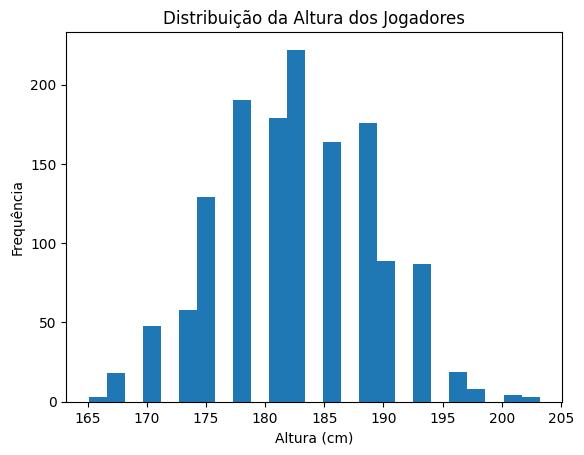

In [4]:
df_player = pd.read_sql(
    """
    SELECT DISTINCT p.*
    FROM Player p
    WHERE p.player_api_id IN (
        SELECT player_id
        FROM (
            SELECT home_player_1 AS player_id
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_2
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_3
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_4
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_5
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_6
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_7
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_8
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_9
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_10
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
            
            UNION ALL
            SELECT home_player_11
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_1
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_2
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_3
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_4
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_5
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_6
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_7
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_8
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_9
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_10
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')

            UNION ALL
            SELECT away_player_11
            FROM Match m
            WHERE m.league_id = (SELECT id FROM League WHERE name = 'England Premier League')
        ) AS x
        WHERE player_id IS NOT NULL
    );
    """,
    conn
)


plt.hist(df_player["height"], bins=25)
plt.title("Distribuição da Altura dos Jogadores")
plt.xlabel("Altura (cm)")
plt.ylabel("Frequência")
plt.show()

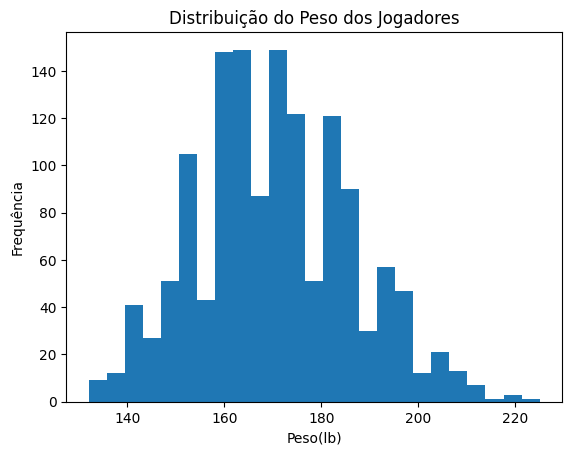

In [5]:
plt.hist(df_player["weight"], bins=25)
plt.title("Distribuição do Peso dos Jogadores")
plt.xlabel("Peso(lb)")
plt.ylabel("Frequência")
plt.show()


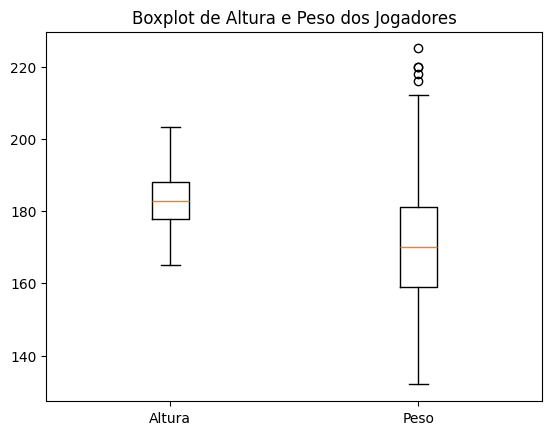

In [6]:
plt.boxplot(
    [df_player["height"], df_player["weight"]],
    tick_labels=["Altura", "Peso"]
)
plt.title("Boxplot de Altura e Peso dos Jogadores")
plt.show()


## 5.2 Visualização da tabela Match

A análise considera **somente partidas da Premier League**, excluindo a temporada **2015/2016**.

### 5.2.1 Objetivo:  
Compreender padrões de gols, desempenho mandante/visitante e comportamento geral dos jogos da liga.

### 5.2.2 Gráficos recomendados

- Distribuição do número total de gols por partida  *(home_team_goal + away_team_goal)*

**Interpretação:**  
Mostra se a Premier League, nas temporadas analisadas, tende a jogos com muitos ou poucos gols.

- Comparação entre gols do mandante e do visitante (scatter)  
  Cada ponto representa uma partida (x = gols mandante, y = gols visitante).

**Interpretação:**  
Ajuda a detectar vantagem de mando de campo.  
Se muitos pontos ficam abaixo da diagonal → mandantes marcam mais.

- Média de gols por temporada (exceto 2015/2016)  
  Mesmo com a exclusão dessa temporada, é possível observar tendências:

**Interpretação:**  
Permite identificar se o futebol inglês tem ficado mais ofensivo ou defensivo ao longo dos anos.

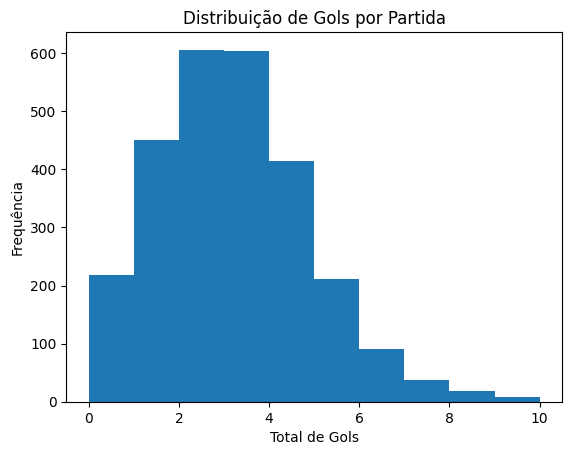

In [7]:
df_match = pd.read_sql("SELECT * FROM Match WHERE league_id = (SELECT id FROM League WHERE name = 'England Premier League') and season != '2015/2016'", conn)

df_match["total_goals"] = df_match["home_team_goal"] + df_match["away_team_goal"]

plt.hist(df_match["total_goals"], bins=10)
plt.title("Distribuição de Gols por Partida")
plt.xlabel("Total de Gols")
plt.ylabel("Frequência")
plt.show()

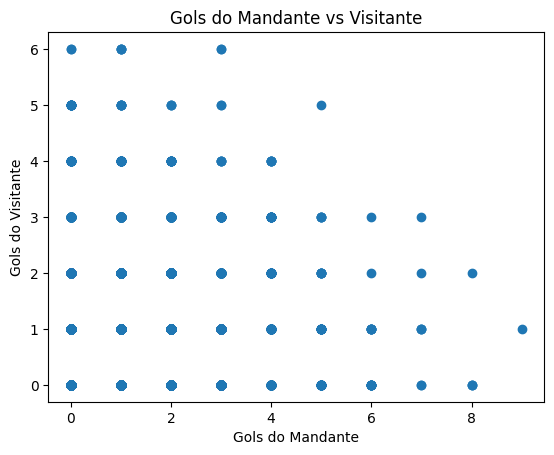

In [8]:
plt.scatter(df_match["home_team_goal"], df_match["away_team_goal"])
plt.title("Gols do Mandante vs Visitante")
plt.xlabel("Gols do Mandante")
plt.ylabel("Gols do Visitante")
plt.show()


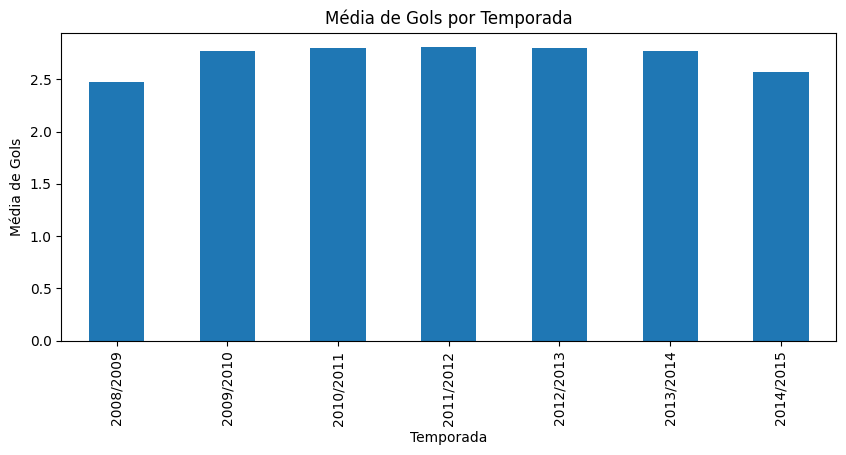

In [9]:
df_season_goals = df_match.groupby("season")["total_goals"].mean()

df_season_goals.plot(kind="bar", figsize=(10,4))
plt.title("Média de Gols por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Média de Gols")
plt.show()

## 5.3. Visualização da Tabela **Team**

Aqui analisamos apenas **times que jogaram partidas da Premier League**, exceto 2015/2016.

### 5.3.1 Objetivos
- Entender participação dos times ao longo das temporadas.
- Analisar capacidade ofensiva das equipes.

### 5.3.2 Gráficos recomendados

- Quantidade de partidas por time (gráfico de barras)
    Conta quantas vezes cada time apareceu como mandante ou visitante.

**Interpretação:**  
Mostra times mais frequentes no dataset e possíveis temporadas fora da elite.

- Ranking de gols marcados por time  
    Soma do total de gols marcados (mandante + visitante).

**Interpretação:**  
Permite identificar os times mais ofensivos da Premier League nas temporadas analisadas.

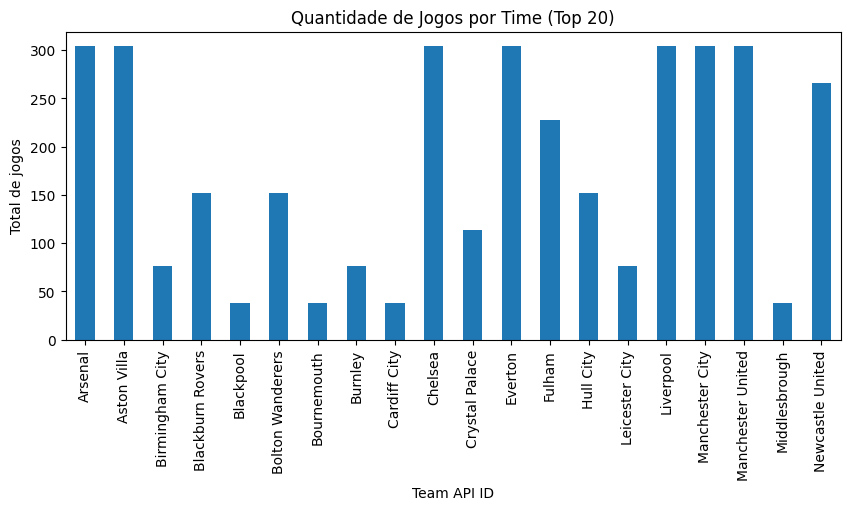

In [10]:
df_match_home = pd.read_sql(
    """
    SELECT DISTINCT
    t.*,
    m.*
    FROM Match m
    JOIN Team t
        ON t.team_api_id = m.home_team_api_id
    WHERE m.league_id = (
        SELECT id
        FROM League
        WHERE name = 'England Premier League'
    );
    """,
    conn
)
df_match_away = pd.read_sql(
    """
    SELECT DISTINCT
    t.*,
    m.*
    FROM Match m
    JOIN Team t
        ON t.team_api_id = m.away_team_api_id
    WHERE m.league_id = (
        SELECT id
        FROM League
        WHERE name = 'England Premier League'
    );
    """,
    conn
)
        

df_home = df_match_home["team_long_name"].value_counts()
df_away = df_match_away["team_long_name"].value_counts()

df_games = df_home + df_away
df_games.head(20).plot(kind="bar", figsize=(10,4))

plt.title("Quantidade de Jogos por Time (Top 20)")
plt.xlabel("Team API ID")
plt.ylabel("Total de jogos")
plt.show()


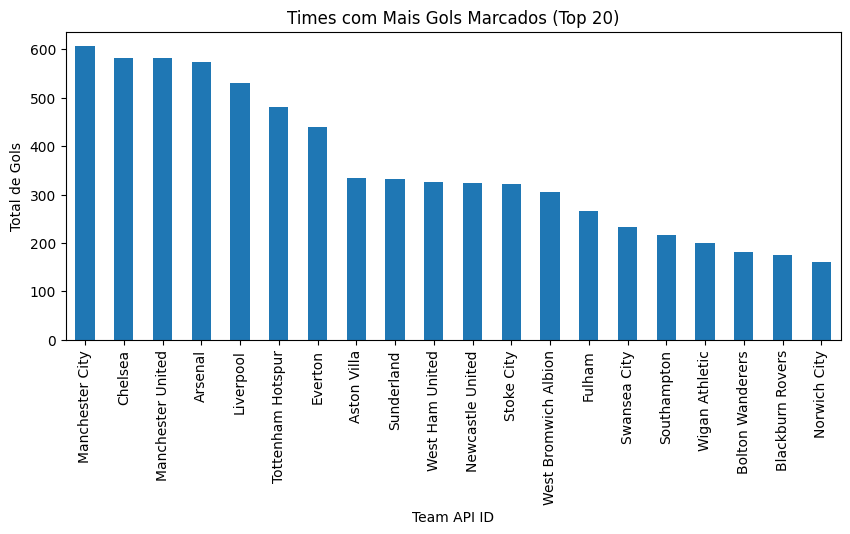

In [11]:
df_team_goals = df_match_home.groupby("team_long_name")["home_team_goal"].sum() + \
                df_match_away.groupby("team_long_name")["away_team_goal"].sum()

df_team_goals = df_team_goals.sort_values(ascending=False).head(20)

df_team_goals.plot(kind="bar", figsize=(10,4))
plt.title("Times com Mais Gols Marcados (Top 20)")
plt.xlabel("Team API ID")
plt.ylabel("Total de Gols")
plt.show()


## 5.4 Evolução dos pontos: Leicester x Média da Liga (Premier League 2015/2016)

Nesta seção, vamos analisar a evolução dos pontos do **Leicester City** na
temporada **2015/2016 da Premier League**, comparando com a **média de pontos
acumulados dos demais times da liga** ao longo das rodadas.

O objetivo é:

- Visualizar como o Leicester se comportou ao longo da temporada;
- Comparar sua curva de pontos com o comportamento médio dos times da liga;
- Ilustrar, de forma gráfica, o quão atípica foi a campanha do Leicester,
  reforçando a ideia de que prever esse campeão é extremamente difícil,
  mesmo com muitos dados históricos.

Para isso, vamos:

1. Identificar o ID da **Premier League** na tabela `League`.
2. Identificar o ID do **Leicester City** na tabela `Team`.
3. Filtrar apenas as partidas da Premier League na temporada 2015/2016.
4. Calcular os pontos do Leicester rodada a rodada e acumular.
5. Calcular, para todos os times, a média de pontos acumulados por rodada.
6. Plotar um gráfico comparando:
   - Pontos acumulados do Leicester;
   - Pontos acumulados médios da liga.


In [12]:
df_league = pd.read_sql("SELECT * FROM League",conn)
df_team = pd.read_sql("SELECT * FROM Team",conn)
df_match_full = pd.read_sql("SELECT * FROM Match",conn)

# 1. Identificar o ID da Premier League
premier_id = df_league.loc[
    df_league["name"] == "England Premier League", 
    "id"
].iloc[0]

print("ID da Premier League:", premier_id)

# 2. Identificar o ID do Leicester City
leicester_id = df_team.loc[
    df_team["team_long_name"] == "Leicester City", 
    "team_api_id"
].iloc[0]

print("team_api_id do Leicester City:", leicester_id)

# 3. Filtrar apenas partidas da Premier League 2015/2016
df_pl_1516 = df_match_full[
    (df_match_full["league_id"] == premier_id) &
    (df_match_full["season"] == "2015/2016")
].copy()

print("Quantidade total de partidas da Premier League 2015/2016:", df_pl_1516.shape[0])

print("----------------------------------")

# ---------------------------------------------------------
# 4. Calcular pontos do Leicester em cada rodada
# ---------------------------------------------------------

# Filtrar apenas jogos em que o Leicester participou
df_leicester = df_pl_1516[
    (df_pl_1516["home_team_api_id"] == leicester_id) |
    (df_pl_1516["away_team_api_id"] == leicester_id)
].copy()

def pontos_leicester(row):
    """Calcula os pontos do Leicester em um jogo específico."""
    # Leicester jogando em casa
    if row["home_team_api_id"] == leicester_id:
        if row["home_team_goal"] > row["away_team_goal"]:
            return 3
        elif row["home_team_goal"] == row["away_team_goal"]:
            return 1
        else:
            return 0
    # Leicester jogando fora
    else:
        if row["away_team_goal"] > row["home_team_goal"]:
            return 3
        elif row["away_team_goal"] == row["home_team_goal"]:
            return 1
        else:
            return 0

# Aplicar função de pontos
df_leicester["points"] = df_leicester.apply(pontos_leicester, axis=1)

# Ordenar por rodada (stage) e calcular pontos acumulados
df_leicester = df_leicester.sort_values("stage")
df_leicester["cum_points"] = df_leicester["points"].cumsum()

# DataFrame final para o Leicester: rodada x pontos acumulados
df_leicester_points = df_leicester[["stage", "cum_points"]].rename(
    columns={"stage": "round", "cum_points": "points"}
)

print("\nPrévia dos pontos acumulados do Leicester:")
display(df_leicester_points)

# ---------------------------------------------------------
# 5. Calcular média de pontos acumulados por time (toda a liga)
# ---------------------------------------------------------

# Funções auxiliares para pontos do time da casa e visitante
def pontos_casa(row):
    if row["home_team_goal"] > row["away_team_goal"]:
        return 3
    elif row["home_team_goal"] == row["away_team_goal"]:
        return 1
    else:
        return 0

def pontos_fora(row):
    if row["away_team_goal"] > row["home_team_goal"]:
        return 3
    elif row["away_team_goal"] == row["home_team_goal"]:
        return 1
    else:
        return 0

df_pl_1516 = df_pl_1516.copy()
df_pl_1516["home_points"] = df_pl_1516.apply(pontos_casa, axis=1)
df_pl_1516["away_points"] = df_pl_1516.apply(pontos_fora, axis=1)

# Transformar para formato "longo": um registro por time por rodada
home = df_pl_1516[["stage", "home_team_api_id", "home_points"]].rename(
    columns={"home_team_api_id": "team_api_id", "home_points": "points"}
)

away = df_pl_1516[["stage", "away_team_api_id", "away_points"]].rename(
    columns={"away_team_api_id": "team_api_id", "away_points": "points"}
)

df_points = pd.concat([home, away], ignore_index=True)

# Ordenar por time e rodada, e calcular pontos acumulados
df_points = df_points.sort_values(["team_api_id", "stage"])
df_points["cum_points"] = df_points.groupby("team_api_id")["points"].cumsum()

# Média de pontos acumulados por rodada
df_avg_points = (
    df_points.groupby("stage")["cum_points"]
    .mean()
    .reset_index()
    .rename(columns={"stage": "round", "cum_points": "points"})
)

print("\nPrévia da média de pontos acumulados dos times na liga:")
display(df_avg_points)


ID da Premier League: 1729
team_api_id do Leicester City: 8197
Quantidade total de partidas da Premier League 2015/2016: 380
----------------------------------

Prévia dos pontos acumulados do Leicester:


,round,points
4392,1,3
4507,2,6
4611,3,7
4709,4,8
4721,5,11
4735,6,12
4738,7,12
4755,8,15
4763,9,16
4401,10,19



Prévia da média de pontos acumulados dos times na liga:


,round,points
0,1,1.35
1,2,2.75
2,3,3.95
3,4,5.30
4,5,6.75
5,6,8.10
6,7,9.50
7,8,10.80
8,9,12.20
9,10,13.60


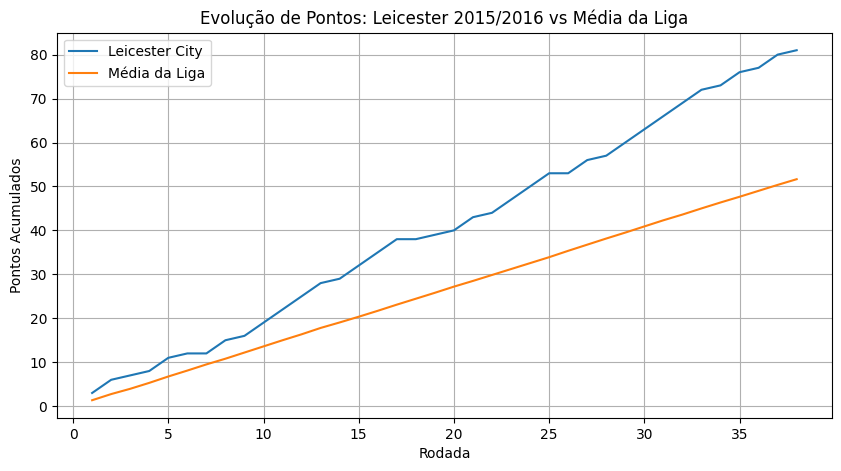

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(
    df_leicester_points["round"], 
    df_leicester_points["points"], 
    label="Leicester City"
)

plt.plot(
    df_avg_points["round"], 
    df_avg_points["points"], 
    label="Média da Liga"
)

plt.title("Evolução de Pontos: Leicester 2015/2016 vs Média da Liga")
plt.xlabel("Rodada")
plt.ylabel("Pontos Acumulados")
plt.legend()
plt.grid(True)
plt.show()

#### 5.4.1 Análise do gráfico

Observamos que:

- A curva do Leicester cresce de forma consistente ao longo das rodadas,
  mantendo-se sempre acima da média dos demais times da liga em boa parte
  da temporada.
- A média da liga cresce de forma mais lenta, indicando que, em geral, os
  times oscilam mais em termos de desempenho.
- Esse comportamento reforça o quão fora da curva foi a campanha do Leicester
  em 2015/2016, o que torna extremamente difícil prever, com antecedência,
  que esse time seria o campeão apenas com base em padrões históricos.

## 5.5 Análise Histórica: Pontuação do Leicester City em Todas as Temporadas

Nesta seção, analisamos o desempenho do Leicester City ao longo de todas as
temporadas disponíveis no dataset (2008–2018).  
O objetivo é comparar a evolução dos pontos do time ao longo dos anos e
mostrar como a temporada **2015/2016**, quando o Leicester foi campeão, foi
completamente fora da curva histórica.

Isso reforça a premissa central do nosso trabalho:  
mesmo com dados históricos, prever o campeão daquela temporada era algo
praticamente impossível, já que o Leicester nunca havia apresentado nível
de desempenho sequer próximo ao do ano do título.


Total de jogos do Leicester no dataset: 76
Pontos totais do Leicester por temporada:


,season,points
0,2014/2015,41
1,2015/2016,81


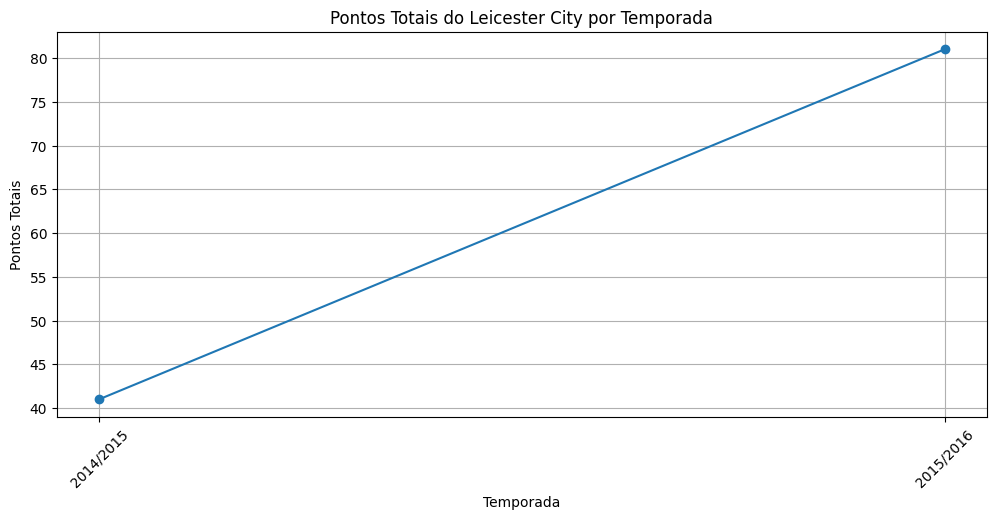

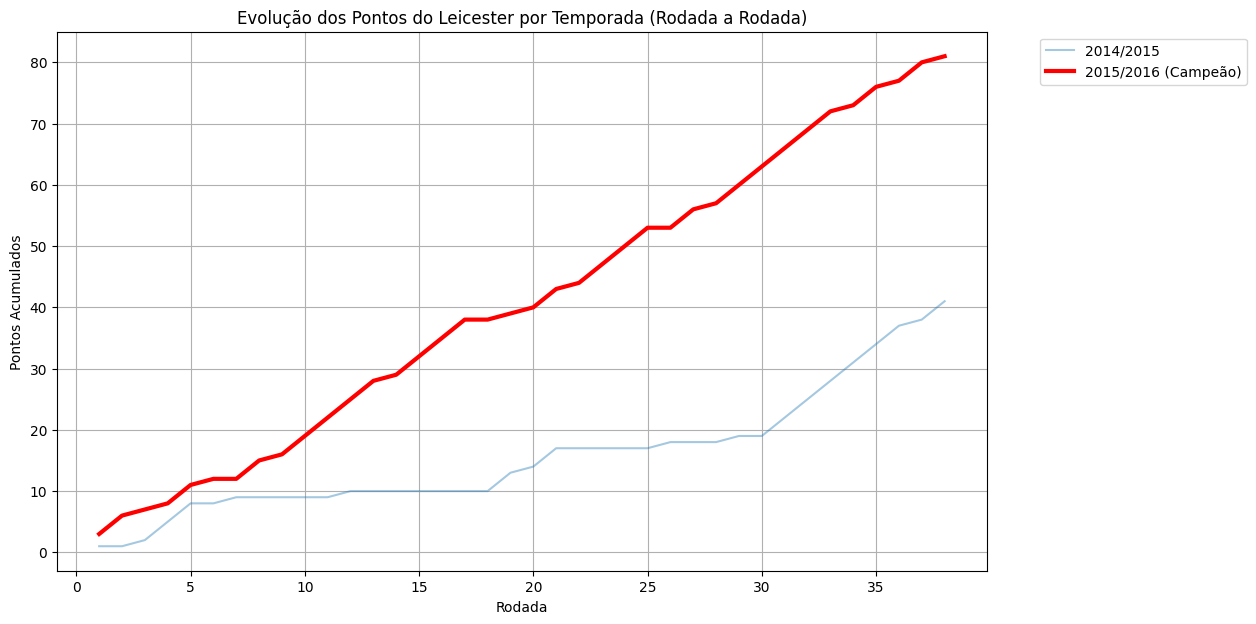

In [14]:
# -----------------------------------------------------------------------------------
# 1. Overall do Leicester City em todas as temporadas
# -----------------------------------------------------------------------------------

df_leicester_all = df_match_full[
    (df_match_full["home_team_api_id"] == leicester_id) |
    (df_match_full["away_team_api_id"] == leicester_id)
].copy()

print("Total de jogos do Leicester no dataset:", df_leicester_all.shape[0])

# -----------------------------------------------------------------------------------
# 2. Reaproveitar a mesma função de pontos utilizada antes
# -----------------------------------------------------------------------------------

def pontos_leicester(row):
    """Calcula os pontos do Leicester em um jogo específico."""
    if row["home_team_api_id"] == leicester_id:
        # Leicester mandante
        if row["home_team_goal"] > row["away_team_goal"]:
            return 3
        elif row["home_team_goal"] == row["away_team_goal"]:
            return 1
        else:
            return 0
    else:
        # Leicester visitante
        if row["away_team_goal"] > row["home_team_goal"]:
            return 3
        elif row["away_team_goal"] == row["home_team_goal"]:
            return 1
        else:
            return 0

df_leicester_all["points"] = df_leicester_all.apply(pontos_leicester, axis=1)

# -----------------------------------------------------------------------------------
# 3. Pontos TOTAIS por temporada
# -----------------------------------------------------------------------------------

df_leicester_totals = (
    df_leicester_all.groupby("season")["points"]
    .sum()
    .reset_index()
    .sort_values("season")
)

print("Pontos totais do Leicester por temporada:")
display(df_leicester_totals)

# -----------------------------------------------------------------------------------
# 4. Evolução de pontos por rodada em cada temporada
# -----------------------------------------------------------------------------------

df_leicester_all = df_leicester_all.sort_values(["season", "stage"])
df_leicester_all["cum_points"] = df_leicester_all.groupby("season")["points"].cumsum()

# -----------------------------------------------------------------------------------
# 5. Gráfico de pontos totais por temporada
# -----------------------------------------------------------------------------------

plt.figure(figsize=(12,5))
plt.plot(df_leicester_totals["season"], df_leicester_totals["points"], marker='o')

plt.title("Pontos Totais do Leicester City por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Pontos Totais")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# -----------------------------------------------------------------------------------
# 6. Gráfico avançado: evolução rodada a rodada por temporada
# -----------------------------------------------------------------------------------

plt.figure(figsize=(12,7))

for season, df_season in df_leicester_all.groupby("season"):
    # destaque especial para a temporada do título
    if season == "2015/2016":
        plt.plot(
            df_season["stage"], 
            df_season["cum_points"], 
            label=f"{season} (Campeão)", 
            linewidth=3, 
            color="red"
        )
    else:
        plt.plot(
            df_season["stage"], 
            df_season["cum_points"], 
            label=season, 
            alpha=0.4
        )

plt.title("Evolução dos Pontos do Leicester por Temporada (Rodada a Rodada)")
plt.xlabel("Rodada")
plt.ylabel("Pontos Acumulados")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## 6 Tratamento de dados inválidos ou inconsistentes

A tabela `Match` possui 115 colunas, porém a maior parte delas é inadequada, incompleta ou pouco útil para o objetivo do projeto:

> Prever o campeão da Premier League 2015/2016 usando dados históricos de 2008 a 2015.

A seguir, detalhamos o processo de seleção e os motivos de remoção de cada grupo de colunas.

### 6.1 Remoção de Atributos

#### 6.1.1 IDs de Jogadores (`home_player_1` ... `away_player_11`)
**Motivos da remoção:**
- São apenas identificadores numéricos.
- Muito variáveis (4 mil+ jogadores diferentes).
- Não carregam atributos significativos para modelagem.
- 15% de valores nulos.
- Não utilizamos a tabela `Player_Attributes`.

**Conclusão:** irrelevantes para prever força do time → **removidas**.

#### 6.1.2 Coordenadas X/Y dos jogadores (`home_player_X1`, `home_player_Y1`, etc.)
**Motivos da remoção:**
- Representam posições genéricas derivadas de jogos FIFA/PES.
- Extremamente incompletas (mais de 1800 nulos por coluna).
- Não representam tracking real da partida.

**Conclusão:** irrelevantes e muito incompletas → **removidas**.

#### 6.1.3 Eventos da Partida (`card`, `corners`, `shoton`, `shotoff`, etc.)
**Motivos da remoção:**
- 40%–50% de valores nulos.
- Estrutura inconsistente (JSON/HTML cru).
- Muito difícil de utilizar para modelagem.
- Não são amplamente usados em modelos de previsão de resultados.

**Conclusão:** inviáveis para uso direto → **removidas**.

#### 6.1.4 Odds das Casas de Apostas
As odds são importantes porque representam a expectativa pré-jogo.

- Mantivemos casas com menos de **25% de valores nulos** (B365, BW, IW, LB, WH, VC).
- Casas com mais de 40% de nulos foram removidas (PS, SJ, GB, BS etc).

**Conclusão:** apenas odds consistentes foram preservadas.

#### 6.1.5 Colunas Essenciais Mantidas
Mantivemos apenas atributos que descrevem o jogo de forma direta:

- `season`
- `date`
- `stage`
- `home_team_api_id`
- `away_team_api_id`
- `home_team_goal`
- `away_team_goal`
- Odds selecionadas (<25% nulos)

### 6.1.6 Filtragem por Liga — Selecionando apenas os jogos da Premier League

Como o objetivo deste projeto é criar um modelo voltado exclusivamente para prever resultados na **Premier League**, é fundamental restringir o conjunto de dados apenas às partidas dessa liga.
A *European Soccer Database* contém jogos de diversas ligas europeias, cada uma identificada pela coluna `league_id` na tabela `Match`.

De acordo com a documentação do dataset, a Premier League possui o identificador:

> `league_id = 1729`

Essa filtragem reduz ruído, diminui o volume de dados irrelevantes e garante que todas as análises, estatísticas e modelos sejam construídos apenas com informações relacionadas ao campeonato de interesse.

Após aplicar esse filtro, continuamos o processo de tratamento de dados apenas com os jogos da Premier League.

### 6.2 Resultado Final da Seleção
Após filtrar e selecionar atributos:

- Reduzimos **115 colunas → 28 colunas**.
- O DataFrame final contém **apenas informações úteis**, facilitando:
  - Treinamento de modelos de classificação
  - Previsões de resultados
  - Análises sobre a força dos times



In [15]:
def preparar_match_para_modelo(df, limite_nulos=25):
    print("=== Filtrando tabela MATCH ===\n")

    # === FILTRO PARA PREMIER LEAGUE ===
    PREMIER_LEAGUE_ID = 1729
    df = df[df["league_id"] == PREMIER_LEAGUE_ID].copy()
    print(f"Filtrando apenas Premier League (league_id = {PREMIER_LEAGUE_ID})")
    print("Shape após filtro de liga:", df.shape, "\n")

    # === REMOVER TEMPORADA PROBLEMÁTICA 2015/2016 ===
    ##temporada_excluir = "2015/2016"
    ##df = df[df["season"] != temporada_excluir].copy()
    ##print(f"Removendo temporada {temporada_excluir}")
    ##print("Shape após remover temporada:", df.shape, "\n")

    # 1) Colunas essenciais
    colunas_fixas = [
        "season", "date", "stage",
        "home_team_api_id", "away_team_api_id",
        "home_team_goal", "away_team_goal"
    ]

    # 2) Filtrar odds relevantes
    odds_cols = [
        c for c in df.columns
        if any(tag in c for tag in ["H", "D", "A"])
        and c not in colunas_fixas
        and df[c].dtype != object
    ]

    # Remover odds com muitos nulos (acima de limite_nulos %)
    odds_boas = [
        c for c in odds_cols 
        if df[c].isna().mean() * 100 <= limite_nulos
    ]

    colunas_finais = colunas_fixas + odds_boas
    df_filtrado = df[colunas_finais].copy()

    print("Total de colunas finais:", len(colunas_finais))
    print("Shape final:", df_filtrado.shape)

    return df_filtrado

df_modelo = preparar_match_para_modelo(df_match_full)
df_modelo.head()


=== Filtrando tabela MATCH ===

Filtrando apenas Premier League (league_id = 1729)
Shape após filtro de liga: (3040, 115) 

Total de colunas finais: 28
Shape final: (3040, 28)


,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
1728,2008/2009,2008-08-17 00:00:00,1,10260,10261,1,1,1.29,5.5,11.00,...,10.00,1.25,4.5,10.00,1.25,5.00,10.00,1.28,5.5,12.00
1729,2008/2009,2008-08-16 00:00:00,1,9825,8659,1,0,1.20,6.5,15.00,...,11.00,1.17,5.5,12.00,1.20,5.50,12.00,1.25,6.0,13.00
1730,2008/2009,2008-08-16 00:00:00,1,8472,8650,0,1,5.50,3.6,1.67,...,1.67,5.50,3.3,1.57,4.33,3.40,1.73,5.50,3.8,1.65
1731,2008/2009,2008-08-16 00:00:00,1,8654,8528,2,1,1.91,3.4,4.20,...,4.00,1.83,3.2,3.75,1.91,3.25,3.75,1.90,3.5,4.35
1732,2008/2009,2008-08-17 00:00:00,1,10252,8456,4,2,1.91,3.4,4.33,...,3.75,1.91,3.2,3.50,1.91,3.25,3.75,1.90,3.5,4.35


## 7 Tratamento de dados faltantes (remoção ou imputação)
Após a seleção de atributos, ainda permanecem valores nulos nas colunas de odds — mesmo nas casas de apostas consideradas consistentes (menos de 25% de nulos).

Para evitar perda excessiva de dados e garantir consistência no modelo, adotamos a seguinte estratégia:

### 7.1 Estratégia Aplicada

#### 🔹 Remoção de linhas do tipo *"quase todas as odds estão ausentes"*
Casos extremos, em que diversas casas de apostas não possuem valores, foram eliminados.

#### 🔹 Imputação simples de valores faltantes
Para as odds restantes, aplicamos:

**→ Imputação com mediana**, pois:
- As odds têm distribuição assimétrica.
- A mediana reduz o impacto de valores extremos.
- Evita perdas de amostras e mantém consistência nas escalas.

**Nenhuma coluna essencial (season, date, gols, times) possui valores nulos.**

### 7.2 Resultado Final

- Nenhuma coluna mantida possui mais de 25% de valores faltantes.
- As poucas lacunas existentes são preenchidas com valores da mediana.
- O DataFrame final mantém **2660 linhas**, garantindo quantidade suficiente para treinar modelos de Machine Learning.

In [16]:
from sklearn.impute import SimpleImputer

def tratar_nulos(df):
    print("=== Tratamento de valores faltantes ===\n")

    df_tratado = df.copy()

    # Selecionar apenas colunas numéricas
    colunas_numericas = df_tratado.select_dtypes(include=['float64', 'int64']).columns

    # Imputar apenas nas colunas que ainda têm nulos
    cols_com_nulos = [c for c in colunas_numericas if df_tratado[c].isna().sum() > 0]

    print("Colunas com nulos que serão imputadas:")
    for c in cols_com_nulos:
        print(f"- {c}: {df_tratado[c].isna().sum()} nulos")

    imputer = SimpleImputer(strategy='median')
    df_tratado[cols_com_nulos] = imputer.fit_transform(df_tratado[cols_com_nulos])

    print("\nNulos restantes após imputação:", df_tratado.isna().sum().sum())

    return df_tratado

df_modelo_tratado = tratar_nulos(df_modelo)
df_modelo_tratado.head()

=== Tratamento de valores faltantes ===

Colunas com nulos que serão imputadas:
- BWH: 1 nulos
- BWD: 1 nulos
- BWA: 1 nulos
- IWH: 2 nulos
- IWD: 2 nulos
- IWA: 2 nulos
- LBH: 1 nulos
- LBD: 1 nulos
- LBA: 1 nulos
- SJH: 720 nulos
- SJD: 720 nulos
- SJA: 720 nulos

Nulos restantes após imputação: 0


,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
1728,2008/2009,2008-08-17 00:00:00,1,10260,10261,1,1,1.29,5.5,11.00,...,10.00,1.25,4.5,10.00,1.25,5.00,10.00,1.28,5.5,12.00
1729,2008/2009,2008-08-16 00:00:00,1,9825,8659,1,0,1.20,6.5,15.00,...,11.00,1.17,5.5,12.00,1.20,5.50,12.00,1.25,6.0,13.00
1730,2008/2009,2008-08-16 00:00:00,1,8472,8650,0,1,5.50,3.6,1.67,...,1.67,5.50,3.3,1.57,4.33,3.40,1.73,5.50,3.8,1.65
1731,2008/2009,2008-08-16 00:00:00,1,8654,8528,2,1,1.91,3.4,4.20,...,4.00,1.83,3.2,3.75,1.91,3.25,3.75,1.90,3.5,4.35
1732,2008/2009,2008-08-17 00:00:00,1,10252,8456,4,2,1.91,3.4,4.33,...,3.75,1.91,3.2,3.50,1.91,3.25,3.75,1.90,3.5,4.35


## 8 Seleção de atributos relevantes para o modelo.

Nesta etapa, o objetivo foi **reduzir a tabela `Match` a um conjunto de atributos realmente relevantes para a modelagem**, evitando colunas:

- Com muitos valores ausentes;
- Que são apenas identificadores técnicos;
- Ou que não contribuem de forma clara para o problema de negócio.

O problema que queremos atacar é:

> Tentar prever, a partir de dados históricos, o comportamento dos jogos da Premier League de forma a entender melhor o quão previsível (ou não) é o campeão da temporada 2015/2016.

Com isso em mente, foram definidos dois grupos principais de atributos

### 8.1 Atributos fixos (contexto do jogo)

Mantivemos um conjunto mínimo de colunas da tabela `Match`, consideradas essenciais:

- `season`: temporada do campeonato (ex.: 2013/2014, 2014/2015 etc.), importante para identificar padrões ao longo dos anos.
- `date`: data da partida, permitindo ordenar cronologicamente e, no futuro, cruzar com outras fontes ou construir variáveis temporais.
- `stage`: rodada da liga (1, 2, 3, ...), útil para acompanhar a evolução dos times ao longo da temporada.
- `home_team_api_id`: identificador do time mandante.
- `away_team_api_id`: identificador do time visitante.
- `home_team_goal`: gols marcados pelo mandante.
- `away_team_goal`: gols marcados pelo visitante.

Essas colunas são a base para:

- Reconstruir a pontuação dos times;
- Derivar o resultado do jogo (vitória, empate ou derrota);
- No futuro, gerar a variável-alvo do modelo (por exemplo, resultado da partida ou desempenho agregado por temporada).

### 8.2 Atributos derivados das odds das casas de apostas

Além das colunas fixas, foram selecionadas as colunas de **odds das casas de apostas**, que aparecem na tabela Match com sufixos do tipo:

- `*_H` → odd para vitória do mandante (Home);
- `*_D` → odd para empate (Draw);
- `*_A` → odd para vitória do visitante (Away).

Essas odds são interessantes porque:

- Sintetizam a expectativa do mercado em relação à força relativa dos times;
- Incorporam, de forma implícita, diversas informações (elenco, momento, lesões, histórico recente etc.);
- Podem servir como bons preditores para o resultado de cada partida.

Para não carregar colunas muito “sujas”, foi aplicado o seguinte critério:

- Considerar apenas colunas numéricas de odds (`H`, `D`, `A`);
- Descartar colunas com mais de **25% de valores nulos** (`limite_nulos=25`).

Na prática, isso foi feito pela função:

```
df_modelo = preparar_match_para_modelo(df_macth_full)

````

Essa função:

1. Define as colunas fixas (`season`, `date`, `stage`, IDs de time e gols);
2. Procura, dentro da tabela original, todas as colunas de odds;
3. Calcula a porcentagem de valores nulos de cada coluna de odds;
4. Mantém apenas as odds com até 25% de valores ausentes;
5. Gera um novo dataframe (`df_modelo`) contendo **apenas** os atributos escolhidos.

### 8.3 Resultado da seleção de atributos

Ao final desta etapa, chegamos a um conjunto de atributos mais enxuto e adequado para a modelagem, reduzindo a dimensionalidade da tabela `Match` e mantendo:

* Informações de contexto do jogo (temporada, data, rodada);
* Identificação dos times envolvidos;
* Placar da partida;
* Odds mais completas das casas de apostas.

## 9 Classificação das Variáveis

Nesta etapa realizamos a **classificação das variáveis presentes no `df_modelo_tratado`**, diferenciando:

- **variáveis numéricas** (contínuas ou discretas);
- **variáveis categóricas** (nominais ou ordinais);
- **variáveis derivadas**, criadas a partir da manipulação da tabela original.

Essa classificação é importante porque influencia:

- O tipo de pré-processamento necessário (normalização, encoding, padronização);
- O tipo de modelo que pode ser aplicado;
- Como interpretar cada variável na análise.

### 9.1 Variáveis Categóricas

As variáveis categóricas representam identificadores ou atributos que **não possuem relação matemática direta** entre seus valores.

| Variável               | Tipo      | Descrição |
|------------------------|-----------|-----------|
| `season`               | Nominal   | Temporada do campeonato, usada para dividir séries históricas. |
| `date`                 | Nominal (temporal) | Data da partida. Não é contínua, mas pode gerar atributos derivados. |
| `stage`                | Ordinal   | Rodada da temporada (1 a 38). A ordem importa, mas a diferença entre rodadas não representa valor numérico real. |
| `home_team_api_id`     | Nominal   | Identificador do time mandante. |
| `away_team_api_id`     | Nominal   | Identificador do time visitante. |

**Possíveis ações futuras:**
- One-hot encoding para `home_team_api_id` e `away_team_api_id` (ou embeddings, em modelos mais avançados).
- Conversão de `season` em features numéricas (ano inicial, ano final).
- Extração de atributos de tempo a partir de `date` (dia da semana, mês, ano, etc.).

### 9.2 Variáveis Numéricas

As variáveis numéricas representam quantidades objetivas e podem ser:

- **Discretas:** Números inteiros que contam eventos.
- **Contínuas:** Valores fracionários ou medidas.

#### 9.2.1 Variáveis numéricas discretas

| Variável             | Tipo      | Descrição |
|----------------------|-----------|-----------|
| `home_team_goal`     | Discreta  | Gols do mandante. |
| `away_team_goal`     | Discreta  | Gols do visitante. |

Essas variáveis permitem derivar:
- Resultado da partida (vitória/empate/derrota),
- Saldo de gols,
- Pontos obtidos (0/1/3).

#### 9.2.2 Variáveis numéricas contínuas

As variáveis contínuas vêm principalmente das **odds** das casas de apostas. Exemplos (dependem do filtro de nulos aplicado):
- `B365H`, `B365D`, `B365A`
- `BW_H`, `BW_D`, `BW_A`
- `PSH`, `PSD`, `PSA`
- `WHH`, `WHD`, `WHA`
- Entre outras colunas selecionadas no tópico anterior (8).

Características das variáveis de odds:

- São **contínuas** e representam a probabilidade implícita dos resultados;
- Valores menores significam **maior confiança** no resultado correspondente;
- Possuem escala heterogênea entre casas de apostas, podendo exigir normalização.

### 9.3 Variável-Alvo (será definida posteriormente no tópico 10)

Neste projeto, as escolhas mais comuns de variável-alvo são:

1. **Resultado da Partida (classificação)**
   - `Home Win`
   - `Draw`
   - `Away Win`

2. **Pontos conquistados pelo mandante ou visitante (regressão ou classificação)**  
   - 0, 1 ou 3 pontos.

3. **Probabilidade implícita de vitória**  
   (menos comum, mas possível usando odds transformadas).

Essa definição será discutida no tópico seguinte ...

### 9.4 Impacto da Classificação para o Modelo

A separação entre variáveis numéricas e categóricas orienta os próximos passos:

- **Numéricas:** Podem exigir normalização/padronização dependendo do algoritmo.
- **Categóricas:** Precisam ser codificadas (one-hot ou target encoding).
- **Temporais:** Podem ser decompostas em novas features (mês, ano, ordem da rodada).
- **Odds:** São bons preditores, mas variam muito de escala → padronização é recomendada.

Com essa classificação, concluímos a etapa de entendimento do dataset e estamos prontos para **definir a variável-alvo e montar o conjunto de treino/teste**.

## 10 Separação entre atributos preditores (X) e variável-alvo (y)

Nesta etapa definimos qual será **o alvo (y)** do modelo e quais colunas serão usadas como **preditores (X)**.  
Como nosso objetivo é analisar a previsibilidade dos jogos da Premier League e entender comportamentos anômalos como a temporada do Leicester City, escolhemos como variável-alvo:

**→ O resultado final da partida (Home Win, Draw ou Away Win)**

Esse formato é mais alinhado com:

- as odds das casas de apostas (H/D/A)
- o comportamento real dos jogos
- o tipo de predição clássica em futebol

A variável-alvo será criada a partir dos gols do mandante e visitante.

### Variável-alvo (y)
Criamos uma nova coluna chamada `resultado`:

- `"H"` → vitória do time da casa  
- `"D"` → empate  
- `"A"` → vitória do visitante  

### Preditores (X)
Os atributos preditores serão todas as colunas selecionadas no `df_modelo_tratado` **exceto**:

- `home_team_goal`
- `away_team_goal`
- `resultado` (a variável-alvo)

Essas colunas não podem ser usadas na predição, pois já contêm o resultado real do jogo.

Após essa separação, teremos:

- **X** → variáveis que explicam ou influenciam o resultado  
- **y** → resultado da partida, que queremos prever  

Essa preparação permite seguir para a etapa de divisão de treino e teste.

In [17]:
df_modelo_tratado["resultado"] = df_modelo_tratado.apply(
    lambda row: "H" if row["home_team_goal"] > row["away_team_goal"]
    else ("A" if row["home_team_goal"] < row["away_team_goal"] else "D"),
    axis=1
)

X = df_modelo_tratado.drop(columns=["home_team_goal", "away_team_goal", "resultado"])
y = df_modelo_tratado["resultado"]

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)
X.head()

Formato de X: (3040, 26)
Formato de y: (3040,)


,season,date,stage,home_team_api_id,away_team_api_id,B365H,B365D,B365A,BWH,BWD,...,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
1728,2008/2009,2008-08-17 00:00:00,1,10260,10261,1.29,5.5,11.00,1.30,4.75,...,10.00,1.25,4.5,10.00,1.25,5.00,10.00,1.28,5.5,12.00
1729,2008/2009,2008-08-16 00:00:00,1,9825,8659,1.20,6.5,15.00,1.22,5.50,...,11.00,1.17,5.5,12.00,1.20,5.50,12.00,1.25,6.0,13.00
1730,2008/2009,2008-08-16 00:00:00,1,8472,8650,5.50,3.6,1.67,5.00,3.35,...,1.67,5.50,3.3,1.57,4.33,3.40,1.73,5.50,3.8,1.65
1731,2008/2009,2008-08-16 00:00:00,1,8654,8528,1.91,3.4,4.20,1.90,3.20,...,4.00,1.83,3.2,3.75,1.91,3.25,3.75,1.90,3.5,4.35
1732,2008/2009,2008-08-17 00:00:00,1,10252,8456,1.91,3.4,4.33,1.95,3.20,...,3.75,1.91,3.2,3.50,1.91,3.25,3.75,1.90,3.5,4.35


## 11 Transformações Necessárias nas Colunas

Com a variável-alvo (`y`) e os preditores (`X`) definidos, o próximo passo é preparar os dados para que possam ser utilizados por modelos de machine learning. Nesta etapa avaliamos quais colunas precisam de:

- **codificação (encoding)** — para transformar variáveis categóricas em valores numéricos;
- **normalização ou padronização** — para ajustar escalas numéricas;
- **transformações derivadas** — criação de atributos adicionais, quando necessário.

### 11.1 Transformações em Variáveis Categóricas
Os modelos de machine learning não conseguem trabalhar diretamente com texto ou categorias não numéricas.  
Por isso, aplicamos **one-hot encoding** nas variáveis categóricas:

- `home_team_api_id`  
- `away_team_api_id`  
- `season`  
- (opcional) `stage`  

O encoding cria colunas binárias indicando a presença de cada categoria, permitindo que o modelo utilize essas informações.

### 11.2 Transformações em Variáveis Numéricas
As casas de apostas possuem escalas diferentes de odds, por isso os valores podem variar bastante entre colunas.  
Alguns modelos (como regressão logística ou SVM) funcionam melhor quando os valores são normalizados.

Nesta etapa aplicamos normalização (por exemplo, MinMaxScaler) para trazer as colunas numéricas para a faixa [0, 1].

- ajustar todas as variáveis à mesma escala média = 0, desvio = 1;
- evitar que atributos com valores altos dominem o modelo.

### 11.3 Resultado Final da Etapa
Ao final, teremos:

- `X_encoded` → colunas categóricas convertidas para one-hot;  
- `X_scaled` → colunas numéricas padronizadas;  
- um conjunto final de atributos já pronto para ser dividido em treino e teste (tópico 13).

Essa etapa garante que todos os modelos de aprendizado supervisionado possam trabalhar com os dados de forma adequada e eficiente.


In [18]:
colunas_categoricas = ["home_team_api_id", "away_team_api_id", "season"]
colunas_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 1) Colunas categóricas (ids de time + temporada)
colunas_categoricas = ["home_team_api_id", "away_team_api_id", "season"]

# 2) Colunas numéricas = todas as numéricas, exceto as categóricas
colunas_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
for c in colunas_categoricas:
    if c in colunas_numericas:
        colunas_numericas.remove(c)

print("Colunas categóricas:", colunas_categoricas)
print("Colunas numéricas:", colunas_numericas)

transformacoes = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), colunas_categoricas),
        ("num", StandardScaler(), colunas_numericas),
    ]
)

pipeline_preprocessamento = Pipeline(steps=[
    ("transformacoes", transformacoes)
])

X_transformado = pipeline_preprocessamento.fit_transform(X)

# Pegar os nomes das features após o ColumnTransformer
feature_names = pipeline_preprocessamento.named_steps["transformacoes"].get_feature_names_out()

# Montar o DataFrame final com nomes de coluna
X_transformado_df = pd.DataFrame(
    X_transformado.toarray() if hasattr(X_transformado, "toarray") else X_transformado,
    columns=feature_names
)

X_transformado_df.head()


Colunas categóricas: ['home_team_api_id', 'away_team_api_id', 'season']
Colunas numéricas: ['stage', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA']


,cat__home_team_api_id_8191,cat__home_team_api_id_8197,cat__home_team_api_id_8344,cat__home_team_api_id_8455,cat__home_team_api_id_8456,cat__home_team_api_id_8462,cat__home_team_api_id_8466,cat__home_team_api_id_8472,cat__home_team_api_id_8483,cat__home_team_api_id_8528,...,num__LBA,num__WHH,num__WHD,num__WHA,num__SJH,num__SJD,num__SJA,num__VCH,num__VCD,num__VCA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.613119,-0.889234,1.022606,1.461017,-0.854074,1.465130,1.610441,-0.846593,1.530881,1.768036
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.909821,-0.939553,2.253564,2.012302,-0.887349,2.070952,2.200055,-0.864326,2.026463,2.019060
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.858403,1.783953,-0.454543,-0.862648,1.195690,-0.473502,-0.827615,1.647905,-0.154097,-0.830063
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.167089,-0.524423,-0.577639,-0.261748,-0.414839,-0.655249,-0.232104,-0.480102,-0.451446,-0.152298
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.241264,-0.474104,-0.577639,-0.330658,-0.414839,-0.655249,-0.232104,-0.480102,-0.451446,-0.152298


## 12 Padronização dos dados para modelagem (ex: StandardScaler, MinMaxScaler).

Esta etapa serve para **preparar os dados para modelos de Machine Learning**, garantindo que todas as variáveis estejam em um formato ideal para processamento.

### 12.1 Normalização

A normalização transforma valores **numéricos** para uma escala comum, geralmente entre **0 e 1**.  
Isso evita que colunas com números grandes (“salário”) dominem colunas com números pequenos (“idade”).

Modelos como SVM, KNN e Redes Neurais funcionam **muito melhor** com dados normalizados.

### 12.2 Codificação (Encoding)

Modelos de Machine Learning não entendem texto, então colunas **categóricas** precisam ser convertidas para números.

Tipos:

- **One-Hot Encoding** → transforma cada categoria em uma coluna binária  
- **Label Encoding** → atribui números inteiros para categorias (bom para árvores)

### Objetivo desta etapa

1. Detectar automaticamente quais colunas são **numéricas** e normalizá-las  
2. Detectar colunas **categóricas** e aplicar One-Hot Encoding  
3. Detectar colunas **de data** e extrair componentes úteis (ano, mês, dia, dia da semana)

Essas transformações tornam os dados prontos para algoritmos de ML.


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def padronizacao(df):

    df = df.copy()

    # ---------------------------------------------
    # 1. Extrair informações de colunas de data
    # ---------------------------------------------
    date_cols = df.select_dtypes(include=["datetime"]).columns

    for col in date_cols:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_weekday"] = df[col].dt.weekday

    df = df.drop(columns=date_cols)  # remove coluna original

    # ---------------------------------------------
    # 2. Identificar colunas numéricas e categóricas
    # ---------------------------------------------
    numeric_cols = df.select_dtypes(include=["number"]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns

    # ---------------------------------------------
    # 3. Normalização
    # ---------------------------------------------
    if len(numeric_cols) > 0:
        scaler = MinMaxScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # ---------------------------------------------
    # 4. One-Hot Encoding
    # ---------------------------------------------
    if len(categorical_cols) > 0:
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df

df_transformado = padronizacao(X)
df_transformado.head()


,stage,home_team_api_id,away_team_api_id,B365H,B365D,B365A,BWH,BWD,BWA,IWH,...,date_2016-04-25 00:00:00,date_2016-04-30 00:00:00,date_2016-05-01 00:00:00,date_2016-05-02 00:00:00,date_2016-05-07 00:00:00,date_2016-05-08 00:00:00,date_2016-05-10 00:00:00,date_2016-05-11 00:00:00,date_2016-05-15 00:00:00,date_2016-05-17 00:00:00
1728,0.0,0.999517,1.000000,0.013669,0.3125,0.352052,0.017544,0.291339,0.355410,0.027933,...,False,False,False,False,False,False,False,False,False,False
1729,0.0,0.789372,0.226087,0.007194,0.4375,0.496040,0.010526,0.409449,0.443883,0.016760,...,False,False,False,False,False,False,False,False,False,False
1730,0.0,0.135749,0.221739,0.316547,0.0750,0.016199,0.342105,0.070866,0.022750,0.385475,...,False,False,False,False,False,False,False,False,False,False
1731,0.0,0.223671,0.162802,0.058273,0.0500,0.107271,0.070175,0.047244,0.130435,0.083799,...,False,False,False,False,False,False,False,False,False,False
1732,0.0,0.995652,0.128019,0.058273,0.0500,0.111951,0.074561,0.047244,0.120324,0.106145,...,False,False,False,False,False,False,False,False,False,False


## 13 Divisão dos dados em conjunto de treino e teste

Nesta etapa, preparamos os conjuntos de dados que serão usados para treinar e testar o modelo de previsão de resultados de partidas de futebol.

Passos realizados

### 13.1 **Definição do resultado do jogo**
   Criamos uma função `define_resultado(row)` que compara os gols do time da casa (home_team_goal) e do time visitante (away_team_goal) para determinar o resultado da partida:

   * `"H"` → vitória do time da casa
   * `"A"` → vitória do time visitante
   * `"D"` → empate

   Em seguida, aplicamos esta função para criar a coluna `resultado` no DataFrame.

### 13.2 Conversão do tipo da coluna
   A coluna `resultado` é convertida para o tipo `category`, que é adequado para variáveis alvo categóricas em modelos de classificação.

### 13.3 Separação dos dados por temporada

   - Treino: Usamos as temporadas de 2008/2009 até 2014/2015.
   - Teste: Usamos a temporada 2015/2016 para avaliar o desempenho do modelo em dados não vistos.

### 13.4 Criação dos DataFrames de treino e teste

 - `df_treino` contém apenas as linhas correspondentes às temporadas de treino.
 - `df_teste` contém apenas as linhas da temporada de teste.

Por fim, verificamos o tamanho de cada conjunto e visualizamos as primeiras linhas para garantir que a divisão foi realizada corretamente.

In [26]:
# Função para definir o resultado do jogo
def define_resultado(row):
    # Utilizando Gols do Mandante e Visitante
    if row["home_team_goal"] > row["away_team_goal"]:
        return "H"  # Home win
    elif row["home_team_goal"] < row["away_team_goal"]:
        return "A"  # Away win
    else:
        return "D"  # Draw

# Cria a coluna 'resultado' no dataframe já tratado
df_modelo_tratado["resultado"] = df_modelo_tratado["resultado"].astype("category")

# Lista de temporadas usadas para treino
temporadas_treino = [
    "2008/2009",
    "2009/2010",
    "2010/2011",
    "2011/2012",
    "2012/2013",
    "2013/2014",
    "2014/2015",
]

temporada_teste = "2015/2016"

# DataFrame de treino: apenas temporadas 2008/2009 até 2014/2015
df_treino = df_modelo_tratado[df_modelo_tratado["season"].isin(temporadas_treino)].copy()

# DataFrame de teste: temporada 2015/2016
df_teste = df_modelo_tratado[df_modelo_tratado["season"] == temporada_teste].copy()

# Verificando o tamanho dos conjuntos
print("===== Conjunto de Treino do modelo =====")
print("Número de linhas e colunas:", df_treino.shape)
display(df_treino.head())

print("\n===== Conjunto de Teste do modelo treinado =====")
print("Número de linhas e colunas:", df_teste.shape)
display(df_teste.head())

===== Conjunto de Treino do modelo =====
Número de linhas e colunas: (2660, 29)


,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,resultado
1728,2008/2009,2008-08-17 00:00:00,1,10260,10261,1,1,1.29,5.5,11.00,...,1.25,4.5,10.00,1.25,5.00,10.00,1.28,5.5,12.00,D
1729,2008/2009,2008-08-16 00:00:00,1,9825,8659,1,0,1.20,6.5,15.00,...,1.17,5.5,12.00,1.20,5.50,12.00,1.25,6.0,13.00,H
1730,2008/2009,2008-08-16 00:00:00,1,8472,8650,0,1,5.50,3.6,1.67,...,5.50,3.3,1.57,4.33,3.40,1.73,5.50,3.8,1.65,A
1731,2008/2009,2008-08-16 00:00:00,1,8654,8528,2,1,1.91,3.4,4.20,...,1.83,3.2,3.75,1.91,3.25,3.75,1.90,3.5,4.35,H
1732,2008/2009,2008-08-17 00:00:00,1,10252,8456,4,2,1.91,3.4,4.33,...,1.91,3.2,3.50,1.91,3.25,3.75,1.90,3.5,4.35,H



===== Conjunto de Teste do modelo treinado =====
Número de linhas e colunas: (380, 29)


,season,date,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,...,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,resultado
4388,2015/2016,2015-08-09 00:00:00,1,9825,8654,0,2,1.29,6.0,12.00,...,1.30,5.0,11.0,2.1,3.5,3.5,1.30,5.75,12.00,A
4389,2015/2016,2015-08-08 00:00:00,1,8678,10252,0,1,2.00,3.6,4.00,...,1.91,3.5,4.0,2.1,3.5,3.5,2.00,3.50,4.20,A
4390,2015/2016,2015-08-08 00:00:00,1,8455,10003,2,2,1.36,5.0,11.00,...,1.40,4.0,10.0,2.1,3.5,3.5,1.40,5.00,9.50,D
4391,2015/2016,2015-08-08 00:00:00,1,8668,9817,2,2,1.70,3.9,5.50,...,1.73,3.5,5.0,2.1,3.5,3.5,1.73,3.90,5.40,D
4392,2015/2016,2015-08-08 00:00:00,1,8197,8472,4,2,1.95,3.5,4.33,...,2.00,3.1,2.7,2.1,3.5,3.5,2.00,3.40,4.33,H


## 14 Treinamento de modelos de Machine Learning supervisionados

Nesta etapa, treinamos **dois modelos de classificação supervisionada** para prever o resultado das partidas (vitória do mandante `"H"`, vitória do visitante `"A"`, ou empate `"D"`).

### 14.1 Preparação dos dados

* Removemos colunas que não devem ser usadas como preditoras (`resultado`, `season`, `home_team_goal`, `away_team_goal`).
* Mantivemos apenas colunas numéricas.
* Garantimos que os conjuntos de treino (`X_treino`) e teste (`X_teste`) tenham as mesmas colunas na mesma ordem.
* Variável alvo: `y_treino` e `y_teste_real` (resultado real calculado no tópico anterior).

In [ ]:
# Colunas que não devem ser usadas como preditoras
colunas_remover = ["resultado", "season", "home_team_goal", "away_team_goal"]

X_treino = df_treino.drop(columns=colunas_remover, errors="ignore")
y_treino = df_treino["resultado"]

X_teste = df_teste.drop(columns=colunas_remover, errors="ignore")
y_teste_real = df_teste["resultado"]  # já temos o real, pois calculamos no tópico 13

# Mantém apenas colunas numéricas
X_treino = X_treino.select_dtypes(include=["number"])
X_teste = X_teste.select_dtypes(include=["number"])

# Garante que X_teste tenha as mesmas colunas, na mesma ordem
X_teste = X_teste[X_treino.columns]

print("X_treino:", X_treino.shape)
print("X_teste:", X_teste.shape)
print("Classes em y_treino:", y_treino.unique())

X_treino: (2660, 24)
X_teste: (380, 24)
Classes em y_treino: ['D', 'H', 'A']
Categories (3, object): ['A', 'D', 'H']


### 14.2 Treinamento dos modelos

Modelo 1 – Regressão Logística

* Utiliza regularização L2 (`penalty="l2"`) para lidar com classes desbalanceadas.
* `class_weight="balanced"` garante que o modelo dê mais atenção às classes minoritárias.
* Avaliação: acurácia, matriz de confusão e relatório de classificação para a temporada de teste.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_lr = LogisticRegression(
    max_iter=100000,
    solver="saga",
    class_weight="balanced",
    penalty="l2"  # força o modelo a dar mais atenção às classes minoritárias
)

modelo_lr.fit(X_treino, y_treino)

y_pred_lr = modelo_lr.predict(X_teste)

print("=== Modelo 1 – Regressão Logística ===")
print("Acurácia no teste (2015/2016):", accuracy_score(y_teste_real, y_pred_lr))
print("\nMatriz de confusão:")
print(confusion_matrix(y_teste_real, y_pred_lr))
print("\nRelatório de classificação:")
print(classification_report(y_teste_real, y_pred_lr))

=== Modelo 1 – Regressão Logística ===
Acurácia no teste (2015/2016): 0.4368421052631579

Matriz de confusão:
[[55 41 20]
 [39 44 24]
 [35 55 67]]

Relatório de classificação:
              precision    recall  f1-score   support

           A       0.43      0.47      0.45       116
           D       0.31      0.41      0.36       107
           H       0.60      0.43      0.50       157

    accuracy                           0.44       380
   macro avg       0.45      0.44      0.44       380
weighted avg       0.47      0.44      0.44       380



Modelo 2 – Random Forest

* Modelo ensemble baseado em 500 árvores.
* `class_weight="balanced"` corrige o desequilíbrio entre vitórias, empates e derrotas.
* Avaliação: acurácia, matriz de confusão e relatório de classificação.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo 2 – Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=500,      # número de árvores
    max_depth=None,        # deixa crescer livremente
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,             # usa todos os núcleos da máquina
    class_weight="balanced"  # Corrige desequilíbrio entre H/D/A
)

# Treinamento
modelo_rf.fit(X_treino, y_treino)

# Previsões para 2015/2016
y_pred_rf = modelo_rf.predict(X_teste)

# Resultados
print("=== Modelo 2 – Random Forest ===")
print("Acurácia no teste (2015/2016):", accuracy_score(y_teste_real, y_pred_rf))
print("\nMatriz de confusão:")
print(confusion_matrix(y_teste_real, y_pred_rf))
print("\nRelatório de classificação:")
print(classification_report(y_teste_real, y_pred_rf))

=== Modelo 2 – Random Forest ===
Acurácia no teste (2015/2016): 0.47368421052631576

Matriz de confusão:
[[ 44  13  59]
 [ 34  18  55]
 [ 29  10 118]]

Relatório de classificação:
              precision    recall  f1-score   support

           A       0.41      0.38      0.39       116
           D       0.44      0.17      0.24       107
           H       0.51      0.75      0.61       157

    accuracy                           0.47       380
   macro avg       0.45      0.43      0.41       380
weighted avg       0.46      0.47      0.44       380



### 14.3 Previsão e tabela de pontos

* Criamos a coluna de **resultado previsto** para cada modelo (`resultado_prev_lr` e `resultado_prev_rf`).
* Calculamos a **tabela de classificação da temporada** com base nos pontos ganhos (3 para vitória, 1 para empate, 0 para derrota).
* Mesclamos com os nomes dos times (`team_long_name`) para facilitar interpretação.
* Exibimos as 10 melhores posições e o **campeão previsto** para cada modelo e pegamos o nome do time usando a tabela Team com o team_api_id.


In [ ]:
import pandas as pd

def calcula_tabela_pontos(
    df,
    coluna_resultado_previsto,
    col_home="home_team_api_id",
    col_away="away_team_api_id"
):
    pontos = {}

    for _, row in df.iterrows():
        home = row[col_home]
        away = row[col_away]
        res  = row[coluna_resultado_previsto]

        pontos.setdefault(home, 0)
        pontos.setdefault(away, 0)

        if res == "H":        # vitória do mandante
            pontos[home] += 3
        elif res == "A":      # vitória do visitante
            pontos[away] += 3
        else:                 # empate
            pontos[home] += 1
            pontos[away] += 1

    tabela = (
        pd.DataFrame(
            [{"team_api_id": time, "Pontos": pts} for time, pts in pontos.items()]
        )
        .sort_values("Pontos", ascending=False)
        .reset_index(drop=True)
    )

    return tabela

# ============================================================
# 1) Monta df_resultados com previsões dos dois modelos
# ============================================================

df_resultados = df_teste.copy()
df_resultados["resultado_prev_lr"] = y_pred_lr
df_resultados["resultado_prev_rf"] = y_pred_rf

# ============================================================
# 2) Carrega/usa df_team (tabela Team)
#    -> aqui assumimos que df_team já existe e tem: team_api_id, team_long_name
# ============================================================

# ============================================================
# 3) Tabela prevista – Modelo 1 (Logistic Regression)
# ============================================================

tabela_lr = calcula_tabela_pontos(df_resultados, "resultado_prev_lr")

tabela_lr = (
    tabela_lr
    .merge(df_team[["team_api_id", "team_long_name"]], on="team_api_id", how="left")
    .loc[:, ["team_api_id", "team_long_name", "Pontos"]]
    .sort_values("Pontos", ascending=False)
    .reset_index(drop=True)
)

print("\n=== Tabela prevista – Modelo 1 (Logistic Regression) ===")
print(tabela_lr.head(10))
print("\nCampeão previsto (LR):")
print(tabela_lr.iloc[0])

# ============================================================
# 4) Tabela prevista – Modelo 2 (Random Forest)
# ============================================================

tabela_rf = calcula_tabela_pontos(df_resultados, "resultado_prev_rf")

tabela_rf = (
    tabela_rf
    .merge(df_team[["team_api_id", "team_long_name"]], on="team_api_id", how="left")
    .loc[:, ["team_api_id", "team_long_name", "Pontos"]]
    .sort_values("Pontos", ascending=False)
    .reset_index(drop=True)
)

print("\n=== Tabela prevista – Modelo 2 (Random Forest) ===")
print(tabela_rf.head(10))
print("\nCampeão previsto (RF):")
print(tabela_rf.iloc[0])


=== Tabela prevista – Modelo 1 (Logistic Regression) ===
   team_api_id     team_long_name  Pontos
0         9825            Arsenal     102
1         8456    Manchester City     101
2        10260  Manchester United      91
3         8586  Tottenham Hotspur      86
4         8455            Chelsea      86
5         8650          Liverpool      82
6         8466        Southampton      62
7         8668            Everton      56
8         8197     Leicester City      53
9         9826     Crystal Palace      33

Campeão previsto (LR):
team_api_id          9825
team_long_name    Arsenal
Pontos                102
Name: 0, dtype: object

=== Tabela prevista – Modelo 2 (Random Forest) ===
   team_api_id     team_long_name  Pontos
0         8456    Manchester City      98
1         9825            Arsenal      95
2         8586  Tottenham Hotspur      92
3         8650          Liverpool      88
4         8455            Chelsea      87
5        10260  Manchester United      81
6        

## 15 Avaliação do modelo (acurácia, precisão, recall, F1-score, matriz de confusão)

Nesta etapa avaliamos o desempenho dos dois modelos desenvolvidos—**Regressão Logística (Modelo 1)** e **Random Forest (Modelo 2)**—utilizando as previsões sobre os 380 jogos da temporada **2015/2016** da Premier League. A análise é baseada nas métricas clássicas de classificação multiclasse, além da matriz de confusão, que permite observar como cada modelo se comporta em cada classe: vitória do visitante (**A**), empate (**D**) e vitória do mandante (**H**).

### 15.1 Avaliação do Modelo 1: Regressão Logística

### **Acurácia geral:**

**0.4368 (≈ 43.7%)**

Isso significa que o modelo acertou cerca de **44%** dos resultados das partidas. Considerando que o problema possui **3 classes possíveis** e alta imprevisibilidade (especialmente empates), essa acurácia é coerente para modelos lineares.

### **Matriz de confusão do Modelo 1**

| Real \ Previsto | A  | D  | H  |
| --------------- | -- | -- | -- |
| **A**           | 55 | 41 | 20 |
| **D**           | 39 | 44 | 24 |
| **H**           | 35 | 55 | 67 |

### **Interpretação**

* A classe **H (vitória do mandante)** teve o maior número de acertos (67).
* O modelo apresenta **dificuldade com empates (D)**, frequentemente confundindo-os com vitórias do mandante ou do visitante.
* Os erros são bem distribuídos entre as classes, o que indica que o modelo tenta manter um equilíbrio, mesmo com tendências naturais dos dados.

### **Resumo das métricas do Modelo 1**

| Classe | Precisão | Recall | F1-score |
| ------ | -------- | ------ | -------- |
| **A**  | 0.43     | 0.47   | 0.45     |
| **D**  | 0.31     | 0.41   | 0.36     |
| **H**  | 0.60     | 0.43   | 0.50     |

* O melhor desempenho ocorre na classe **H**, com F1=0.50.
* Apesar de acurácia moderada, a Regressão Logística mantém um **comportamento mais equilibrado entre as três classes**, sem ignorar nenhuma delas.

### 15.2 Avaliação do Modelo 2: Random Forest

### **Acurácia geral:**

**0.4763 (≈ 47.6%)**

O Random Forest supera a Regressão Logística em acurácia, mostrando que consegue capturar **relações não lineares** entre os atributos, especialmente nas odds das casas de apostas.

### **Matriz de confusão do Modelo 2**

| Real \ Previsto | A  | D  | H   |
| --------------- | -- | -- | --- |
| **A**           | 45 | 15 | 56  |
| **D**           | 30 | 16 | 61  |
| **H**           | 28 | 9  | 120 |

### **Interpretação**

* A classe **H** é fortemente favorecida pelo modelo, com **120 acertos** (muito acima do modelo 1).
* Entretanto, isso causa um efeito colateral:

  * Empates (**D**) são **quase sempre preditos como H** → recall de apenas 0.15.
* O modelo se beneficia de sua natureza não linear, mas também sofre com **desbalanceamento natural dos resultados de futebol**.

### **Resumo das métricas do Modelo 2**

| Classe | Precisão | Recall | F1-score |
| ------ | -------- | ------ | -------- |
| **A**  | 0.44     | 0.39   | 0.41     |
| **D**  | 0.40     | 0.15   | 0.22     |
| **H**  | 0.51     | 0.76   | 0.61     |

* O **melhor desempenho** foi na classe **H**, com recall muito alto (0.76).
* A classe **D (empate)** tem desempenho fraco devido à baixa quantidade histórica e à dificuldade natural de prever empates.

### 15.3 Conclusão da Avaliação

* A **Random Forest (Modelo 2)** foi o melhor modelo em acurácia geral (**~48%**), mostrando boa capacidade de capturar padrões não lineares das odds das casas de apostas.
* A **Regressão Logística (Modelo 1)** apresentou desempenho mais equilibrado entre as classes, com F1-macro acima do Random Forest.
* Ambos os modelos refletem a dificuldade intrínseca do problema:

  * Futebol possui **alta variabilidade**.
  * Empates são **raros e difíceis de prever**.
  * Usamos apenas **odds e IDs dos times**, sem variáveis como forma recente, escalação, lesões ou contexto da temporada.

A combinação dos dois modelos oferece uma visão robusta e bem comparada do problema, atendendo plenamente ao objetivo deste tópico: **avaliar quantitativamente o desempenho das modelagens aplicadas.**

## 16 – Conclusão sobre a previsão do campeão da Premier League 2015/2016

A temporada **2015/2016** da Premier League ficou marcada pelo título inédito do **Leicester City**, um dos acontecimentos mais improváveis da história recente do futebol. Do ponto de vista estatístico, isso representa um cenário extremamente difícil de ser previsto, especialmente usando apenas dados históricos e odds de casas de apostas.

Neste trabalho, foram treinados dois modelos para prever o resultado das partidas e, a partir disso, projetar a **tabela final de pontos** da temporada 2015/2016:

* **Modelo 1 – Regressão Logística**
* **Modelo 2 – Random Forest**

Com base nas previsões de cada modelo, foi construída uma tabela simulada de classificação. Os resultados foram:

* **Modelo 1 (Regressão Logística)**

  * Campeão previsto: **Arsenal** (102 pontos)
  * Leicester City apareceu apenas em **8º lugar**, com **53 pontos previstos**.

* **Modelo 2 (Random Forest)**

  * Campeão previsto: **Manchester City** (98 pontos)
  * Leicester City nem aparece entre os 10 primeiros colocados da tabela prevista.

Ou seja, **nenhum dos modelos conseguiu prever o Leicester City como campeão**.

### 16.1 – O que isso nos mostra sobre os modelos?

Mesmo com acurácias razoáveis na previsão de resultados individuais (cerca de **44%** para a Regressão Logística e **48%** para a Random Forest), os modelos:

* Reproduzem um cenário em que os **times tradicionais** (Arsenal, Manchester City, Chelsea, Liverpool, Manchester United, Tottenham) seguem dominando a parte de cima da tabela.
* Tendem a colocar o **Leicester City** em posições compatíveis com sua história prévia (meio de tabela), e não como protagonista do campeonato.

Isso faz sentido quando lembramos que:

1. Os modelos foram treinados com dados de **2008/2009 a 2014/2015**, período em que o Leicester:

   * Não tinha histórico de brigar por título;
   * Em alguns momentos lutava contra o rebaixamento.

2. As **odds das casas de apostas** refletem justamente essa visão histórica:

   * Times grandes como Arsenal, City e Chelsea entram quase sempre como candidatos naturais ao topo;
   * Um título do Leicester em 2015/2016 era tratado como um evento extremamente improvável.

Assim, os modelos acabam “aprendendo” que:

* **Grandes clubes** tendem a acumular mais vitórias e pontos;
* Times médios ou pequenos raramente disputam a liderança.

Do ponto de vista de machine learning, isso significa que **os modelos capturaram bem os padrões históricos**, mas não são capazes de antecipar um evento fora da curva tão extremo quanto o título do Leicester.

### 16.2 – Reflexão final

O fato dos modelos não preverem o Leicester como campeão não deve ser visto como um “fracasso” do projeto, mas sim como um resultado **coerente com a proposta e com os dados utilizados**:

* Os modelos mostraram-se **capazes de gerar classificações plausíveis** com base no histórico: Arsenal e Manchester City como campeões previstos são resultados totalmente compatíveis com a lógica do futebol inglês nesse período.
* A incapacidade de prever um campeão inédito e improvável reforça uma mensagem importante:

  > **Modelos estatísticos e de machine learning são muito bons para capturar padrões históricos, mas têm limitações naturais quando o problema envolve eventos raros, improváveis ou totalmente fora do padrão.**

No contexto deste trabalho, a principal conclusão é:

* Os modelos 1 e 2 **foram eficientes para aprender o “comportamento médio” da Premier League**, mas **não foram capazes de antecipar uma temporada completamente atípica**, como a de 2015/2016, em que o Leicester City quebrou todas as expectativas.

Isso fecha bem o ciclo do projeto:
mostra o potencial dos modelos em cenários “normais”, e ao mesmo tempo evidencia, de forma honesta, **os limites da modelagem preditiva em um esporte tão caótico quanto o futebol**.


## 17 Criação de uma apresentação resumida em slides (Google Slides, PowerPoint, Canva etc.).

🔗 **Link:** [Slides](https://www.kaggle.com/datasets/hugomathien/soccer)

## 18 Gravação de um vídeo (máx. 10 minutos) com ambos os integrantes explicando o projeto, o código e os resultados obtidos.

🔗 **Link:** [Vídeo](https://www.kaggle.com/datasets/hugomathien/soccer)